<a href="https://colab.research.google.com/github/Bruno-Noriaki/Wallmart_Sales/blob/main/Wallmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

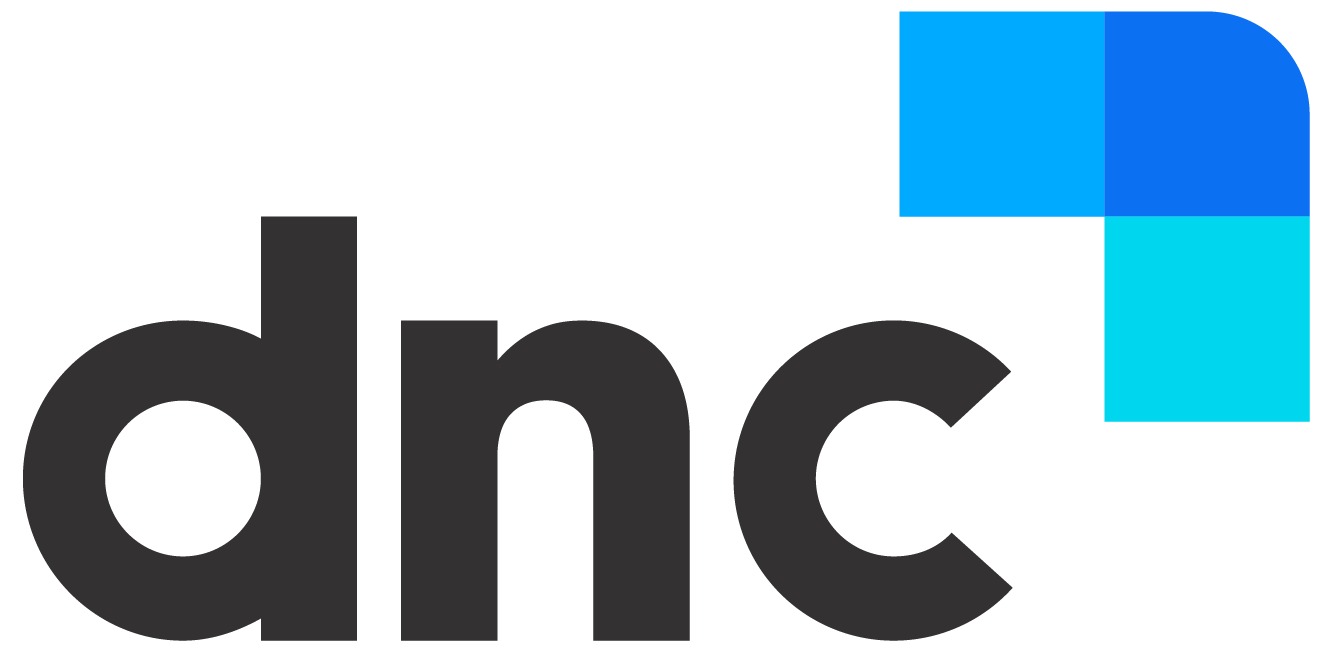

**Escola DNC** - Turma DS06

**Discente:** Bruno Noriaki de Moura Tsuha


Projeto desenvolvido em Google Colab, disponível [neste link](https://https://colab.research.google.com/drive/1KR0dEbn9QaH0u7EYKRJ6LPch7mmLXToD?usp=sharing)

O banco de dados utilizado está disponível [neste link](https://www.kaggle.com/code/yasirmaqboolmian/wallmart-sales-analysis)


In [ ]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots as mk

#**A Questão de Negócio:**

A base de dados trata-se da relação de vendas por unidade do walmart com relação a algumas variáveis qualitativas, como preço do combustível, avaliação de feriado, temperatura da cidade, inflação e percentual de desemprego.


**1.1 Qual a minha meta?**


Avaliar qual seria a melhor das filiais para expandir seu tamanho


**1.2 Como posso chegar?**


Primeiramente, entender quais seriam os efeitos e necessidades que uma loja teria ao ser expandida.


A partir desses requisitos, avaliar os comportamento de cada uma das filiais

#**O Entendimento do Negócio:**

**2.1 Quais dados eu tenho disponível?**

No dataset disponibilizado, temos disponíveis 45 lojas definidas como Stores, com suas vendas semanais em 143 semanas, além disso, variáveis como preço do combustível, taxa de desemprego nos arredores da loja, temperatura e também um indicador de inflação também estão diponibilizados ao longo do tempo. Por fim, há um indicador de feriados na semana indicada.


**2.2 Eles são relevantes para o problema?**

Os dados nos expoem uma visão geral de características do local onde a loja está situada além da performance de cada uma das filiais ao longo de 2 anos.


**2.3 Eles me trazem uma solução direta?**

A partir das informações, é possível conjecturar um cenário positivo a curto prazo para uma loja que receberá uma expansão a fim de aumentar as vendas na mesma.


**2.4 Qual o meu setor ou range de negócio?**

O setor da empresa estudada é o varejo

In [ ]:
data = pd.read_csv('/content/Walmart.csv')

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


#**A Coleta de Dados:**


**3.1 Os dados que eu tenho fazem sentido?**

Os dados de venda estão em dólares, a temperaturas em F, a taxa de desemprego em percentual, a marcação de feriado se apresenta de forma binária

**3.2 Estão no formato que eu gostaria?**

Viu se necessária a alteração do formato da data da semana de object para Date Time que facilitará a manipulação desses dados, além disso, a marcação de feriado também foi transformada para o tipo object já que análises numéricas não fariam sentido por se tratar de uma variável qualitativa

**3.3 O que mais eu consigo obter de informação destes dados?**

Além dos dados já dispostos diretamente, um dos insights produziu uma coluna de comparação entre as médias móveis de vendas em semanas com e sem feriado

In [ ]:
#Alteração da data para Date Time
data['Holiday_Flag'] = data['Holiday_Flag'].apply(lambda x : str(x))
data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   object        
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 402.3+ KB


#**A Limpeza de Dados:**

**4.1 Remoção de dados outliers e valores ausentes**

Não são observados dados duplicados e valores ausentes, a partir da análise estatística .describe(), nota-se também que não há dados passíveis de remoção, já que os valores mínimos e máximos fazem sentido dentro da situação estudada

In [ ]:
data.drop_duplicates()
#Não há dados duplicados

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


#**A Exploração de Dados:**
**5.1 Visualização dos dados**

**5.2 Quais as minhas métricas essenciais**

A principal métrica observada será o desemprenho das lojas através das vendas semanais

A partir das análises que serão demonstradas abaixo, vemos que apenas o desemprego apresenta uma relação inversamente proporcional às vendas semanais.

Além disso, como o objetivo é escolher uma filial para receber uma expansão física, a última métrica a ser observada será o aumento das vendas em feriados.

**5.3 Baseado nos dados, qual decisão devo tomar.**

Como primeira etapa, vemos que as 10 melhores filiais em relação a venda média semanal são  20,  4, 14, 13,  2, 10, 27,  6,  1 e 39

Já acerca da segunda análise, podemos observar que o maior aumento de vendas em datas comemorativas foi observado nas lojas 10, 28, 35, 2, 4, 20, 19, 12, 24

Por fim, foram observados os comportamentos de desemprego ao longo do tempo para as 8 lojas destacadas nas etapas anteriores, assim, notou-se uma grande queda de desemprego nos arredores das lojas 28, 10, 2, 13 e 4, com grande destaque para a loja 4 que apresentou desde o ínicio da pesquisa baixos índices de desemprego que ainda tenderam a abaixar conforme o passar do tempo.

Dessa forma, alguns gráficos confirmativos foram plotados sobre o comportamento da loja 4 que apresentou ótimas métricas em todas as análises, confirmando a relação inversa entre o desemprego e as vendas semanais e seu ótimo desempenho em vendas mantendo sempre vendas semanais superiores à média de vendas.


Lojas com melhor média de Vendas



In [ ]:
sell = data.groupby('Store').mean().sort_values(by = 'Weekly_Sales', ascending = False).head(10).reset_index()

In [ ]:
sell

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,20,2.107677e+06,55.451399,3.417608,209.038131,7.371413
1,4,2.094713e+06,62.253357,3.216972,128.679669,5.964692
2,14,2.020978e+06,57.790979,3.417608,186.285678,8.648748
3,13,2.003620e+06,53.697133,3.286147,128.679669,7.001825
4,2,1.925751e+06,68.216364,3.219699,215.646311,7.623846
5,10,1.899425e+06,72.241189,3.575923,128.679669,8.362965
6,27,1.775216e+06,57.311119,3.578294,139.011284,8.001748
7,6,1.564728e+06,69.700000,3.219699,217.553197,6.606902
8,1,1.555264e+06,68.306783,3.219699,215.996892,7.610420
9,39,1.450668e+06,70.597343,3.219699,214.729069,7.869049


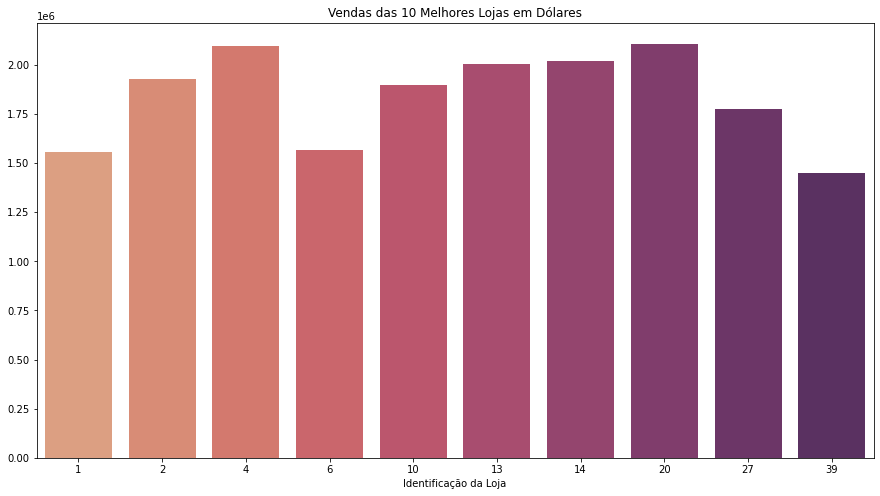

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.barplot(x = sell['Store'], y = sell['Weekly_Sales'], palette = 'flare');
plt.title('Vendas das 10 Melhores Lojas em Dólares');
plt.xlabel('Identificação da Loja');
plt.ylabel('');
#Temos como as melhores médias de venda 20,  4, 14, 13,  2, 10, 27,  6,  1, 39

Comparação entre a média de vendas em feriados e não feriados por cada Loja

In [ ]:
vendas = data.groupby(['Store','Holiday_Flag']).mean().reset_index().sort_values(by='Store')
vendas = vendas[['Store','Holiday_Flag','Weekly_Sales']]

In [ ]:
feriado = vendas[vendas['Holiday_Flag'] == '1'].reset_index(drop=True)
s_feriado = vendas[vendas['Holiday_Flag'] == '0'].reset_index(drop=True)

In [ ]:
feriado['Weekly_Sales_NH'] = s_feriado['Weekly_Sales']
feriado['Diferença'] = feriado['Weekly_Sales'] - feriado['Weekly_Sales_NH']
feriado['Percentual'] = (feriado['Diferença']/feriado['Weekly_Sales_NH'])*100
feriado.drop('Holiday_Flag',inplace = True, axis = 1)

In [ ]:
feriado.sort_values(by = ['Diferença'], ascending=False).head(10)
#As lojas que tiveram maior diferença entre semanas com e sem feriado foram
#10, 28, 35, 2, 4, 20, 19, 12, 24

,Store,Weekly_Sales,Weekly_Sales_NH,Diferença,Percentual
9,10,2113755.949,1.883309e+06,230446.517421,12.236254
27,28,1478244.605,1.311889e+06,166355.623571,12.680617
34,35,1074348.457,9.080992e+05,166249.302789,18.307395
1,2,2079266.900,1.914209e+06,165058.088120,8.622784
3,4,2243102.624,2.083556e+06,159546.780842,7.657428
19,20,2249035.081,2.097048e+06,151986.647541,7.247646
18,19,1577046.734,1.435071e+06,141976.096707,9.893318
11,12,1138140.420,9.992919e+05,138848.495564,13.894688
23,24,1475098.251,1.347857e+06,127240.816639,9.440228
26,27,1892299.278,1.766413e+06,125886.314842,7.126664


Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas?


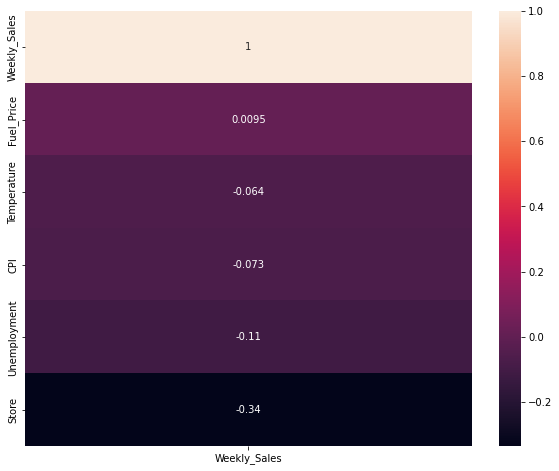

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False), annot = True);
#As vendas parecem variar mais com a quantidade de desemprego de forma inversa

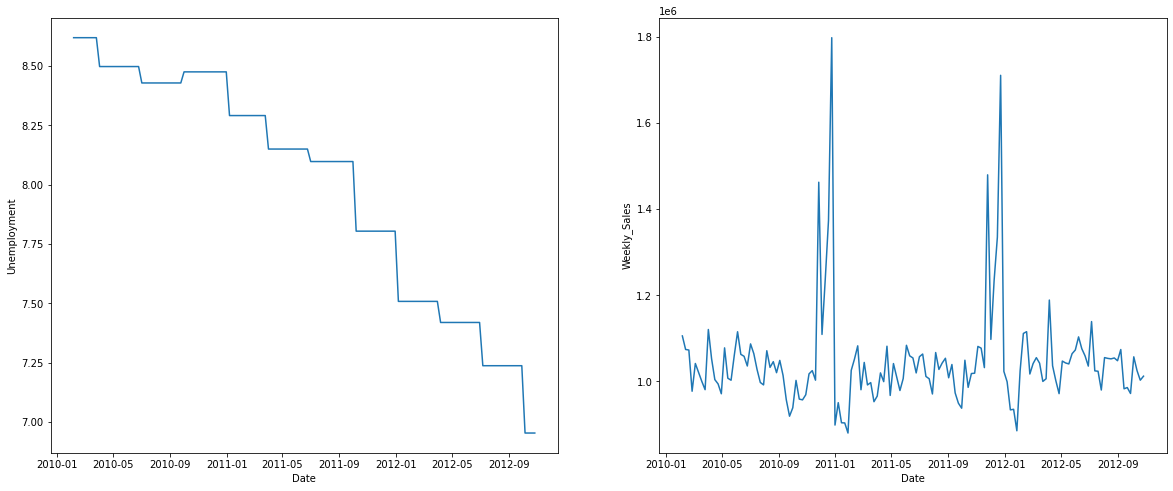

In [ ]:
#Análise mais aprofundada acerca da relação com o desemprego
desemp = data.groupby('Date').mean().reset_index()
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8));
sns.lineplot(data=desemp, x = 'Date', y = 'Unemployment', ax= axes[0]);
sns.lineplot(data=desemp, x = 'Date', y = 'Weekly_Sales', ax= axes[1]);
#Apesar do desemprego cair ao longo do tempo, as vendas totais não seguem
#o mesmo padrão durante todo o tempo analisado, o que indica que a relação
#Não é vista em todas as filiais, somente em algumas

In [ ]:
#Realizarei uma análise do desemprego em relação às vendas nas lojas selecionadas
#durante os passos anteriores 2, 4, 10, 13, 14, 20, 28, 35
lojas = [2, 4, 10, 13, 14, 20, 28, 35]
unem = data[data['Store'].isin(lojas)]

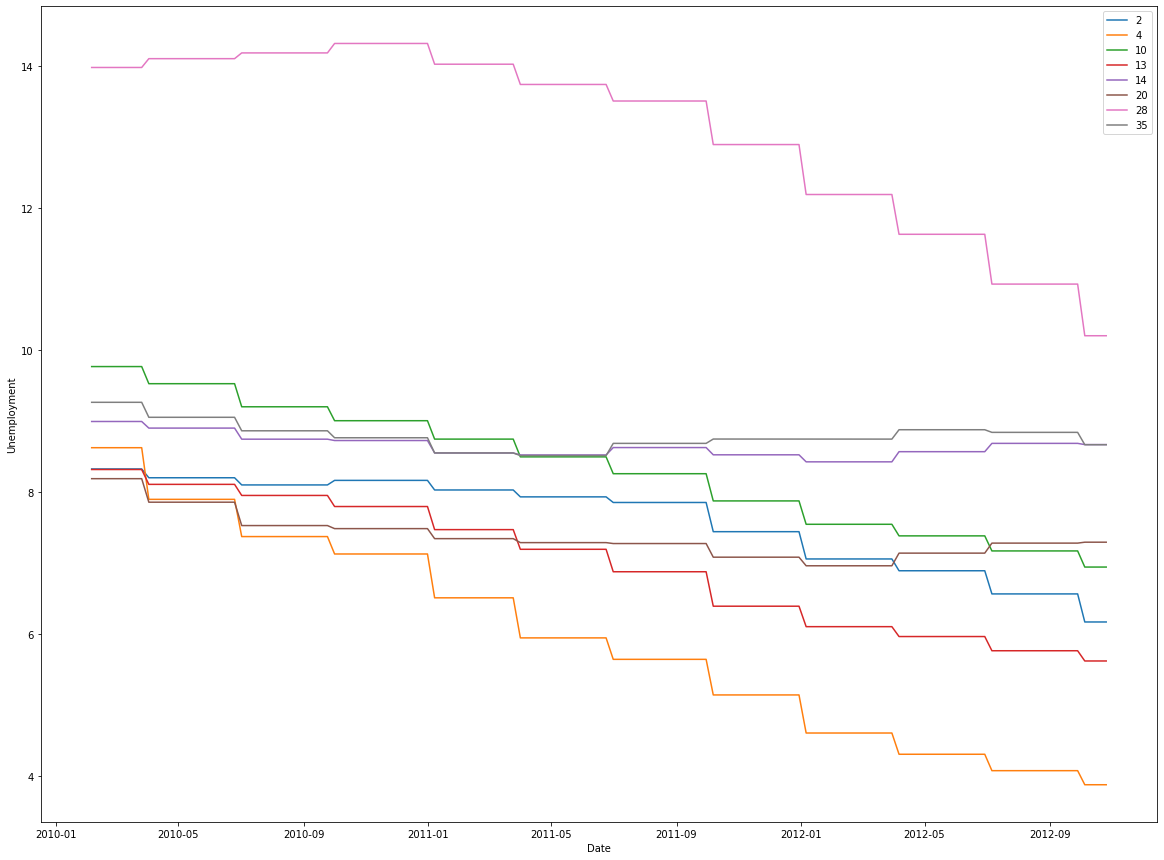

In [ ]:
plt.figure(figsize = (20,15))
for store in lojas:
  sns.lineplot(x = unem['Date'], y = unem.Unemployment[unem['Store'] == store], palette = 'spectral');
plt.legend(labels=lojas);
#Observamos um decrescimo ao longo do tempo no desemprego nas regiões das lojas 28, 10, 2, 13 e 4
#Com um destaque maior para a loja 4 que já apresentava baixo desemprego desde o começo e mesmo assim tendeu a diminuir

Como a loja melhor cotada nas diversas análises feitas foi a loja 4, para confirmação, será analisado sem desempenho em relação à média geral de vendas ao longo do tempo


In [ ]:
a = data[data['Store'] == 4].reset_index()
b = data.groupby('Date').mean().reset_index()

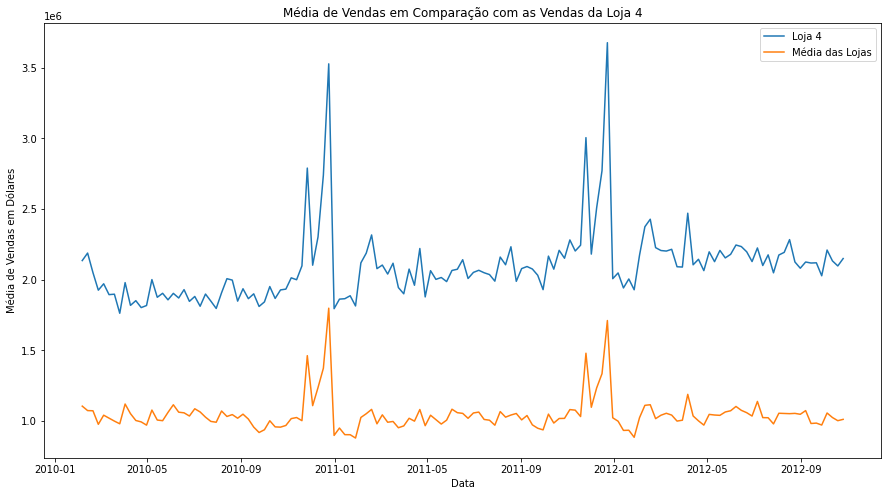

In [ ]:
plt.figure(figsize =(15,8))
j = sns.lineplot(x = a['Date'], y = a['Weekly_Sales'])
i = sns.lineplot(x = b['Date'], y = b['Weekly_Sales'])
plt.title('Média de Vendas em Comparação com as Vendas da Loja 4');
plt.legend(labels = ['Loja 4','Média das Lojas'])
plt.xlabel('Data');
plt.ylabel('Média de Vendas em Dólares');

In [ ]:
Diferença = pd.DataFrame(a['Weekly_Sales'] - b['Weekly_Sales'])

In [ ]:
Diferença[Diferença['Weekly_Sales'] > 0 ]
#A loja 4 esteve acima da média geral de vendas semanais em todas as semanas

,Weekly_Sales
0,1.029572e+06
1,1.114159e+06
2,9.770382e+05
3,9.486495e+05
4,9.294692e+05
...,...
138,1.055734e+06
139,1.152799e+06
140,1.107948e+06
141,1.094547e+06


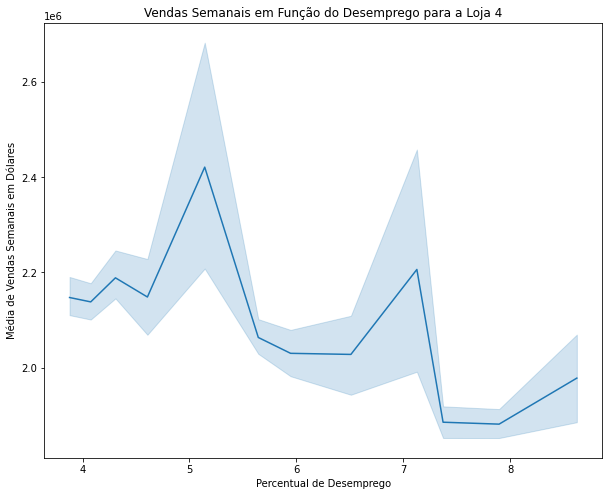

In [ ]:
plt.figure(figsize = (10,8))
sns.lineplot(x = a['Unemployment'], y = a['Weekly_Sales']);
plt.title('Vendas Semanais em Função do Desemprego para a Loja 4')
plt.xlabel('Percentual de Desemprego');
plt.ylabel('Média de Vendas Semanais em Dólares');
#O comportamento da relação entre desemprego e vendas para a loja 4 é confirmado
#Nota-se um comportamente com muitas tendências lineares, com alguns picos de vendas
#Nas datas de comemoração importantes

In [ ]:
a.sort_values(by = 'Weekly_Sales', ascending = False)[['Unemployment','Weekly_Sales','Date']].head(5)
#O comportamento da relação entre desemprego e vendas para a loja 4 é confirmado
#Nota-se um comportamente com muitas tendências lineares, com alguns picos de vendas
#Nas datas de comemoração importantes

,Unemployment,Weekly_Sales,Date
98,5.143,3676388.98,2011-12-23
46,7.127,3526713.39,2010-12-24
94,5.143,3004702.33,2011-11-25
42,7.127,2789469.45,2010-11-26
97,5.143,2771397.17,2011-12-16
